In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
df['Exited'].value_counts().to_frame()

,count
Exited,
0,7963
1,2037


<Axes: xlabel='Exited', ylabel='count'>

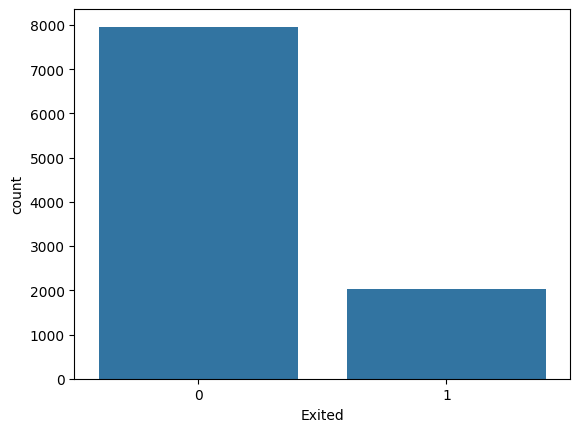

In [13]:
sns.countplot(data=df,x='Exited')

In [17]:
from sklearn.utils import resample

df_max=df[df['Exited']==0]
df_min=df[df['Exited']==1]


df_max_sample =resample(df_max,n_samples=2037,replace=False,random_state=42)

In [18]:
sample_df=pd.concat([df_max_sample,df_min])

In [19]:
sample_df['Exited'].value_counts().to_frame()

,count
Exited,
0,2037
1,2037


In [21]:
sample_df.drop(['RowNumber', 'CustomerId', 'Surname','Geography','Gender'],axis=1,inplace=True)


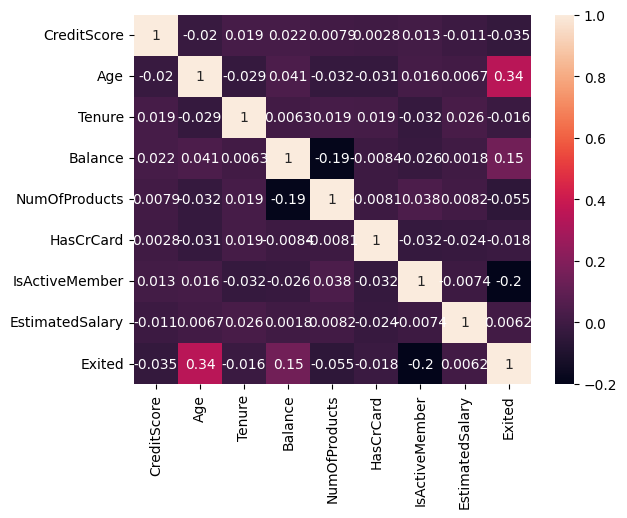

In [25]:
sns.heatmap(sample_df.corr(),annot=True)
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

x = sample_df.drop('Exited',axis=1)
y = sample_df.Exited

x_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(X_test)

Decision Tree Accuracy: 0.7423312883435583


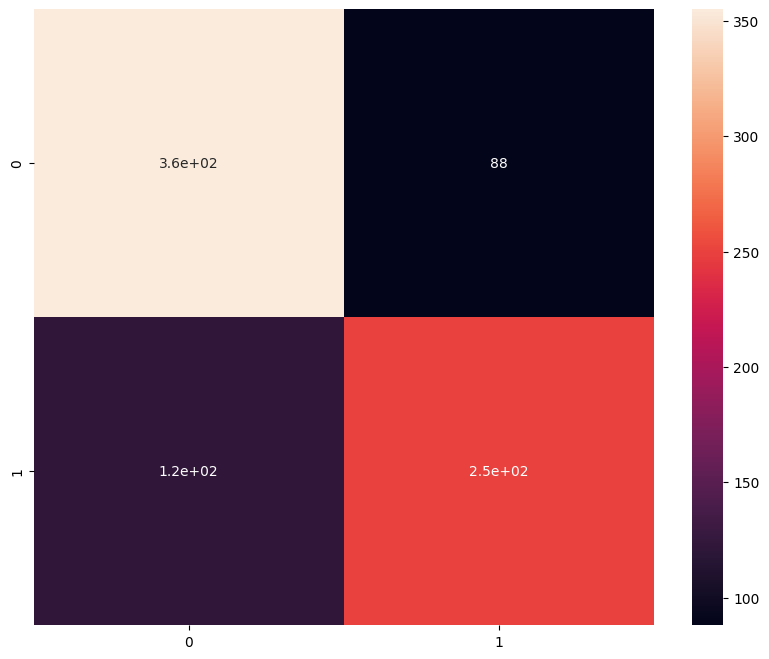

In [30]:
rf_accuracy = accuracy_score(y_test,rf_pred)
print("Decision Tree Accuracy:", rf_accuracy)
cm = confusion_matrix(y_test,rf_pred)
%matplotlib inline
plt.figure(figsize=((10,8)))
sns.heatmap(cm,annot = True)

plt.show()

In [33]:
logistic = LogisticRegression(max_iter=10000)
logistic.fit(x_train,y_train)
logistic_pred = logistic.predict(X_test)



Logistic regression Accuracy: 0.6883435582822086


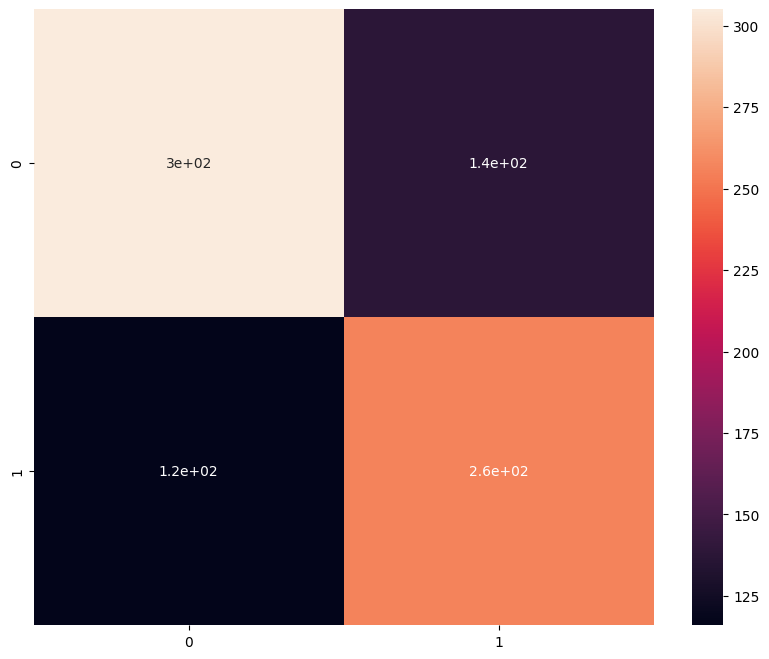

In [34]:
logistic_accuracy = accuracy_score(y_test,logistic_pred)
print("Logistic regression Accuracy:", logistic_accuracy)
cm = confusion_matrix(y_test,logistic_pred)
%matplotlib inline
plt.figure(figsize=((10,8)))
sns.heatmap(cm,annot = True)

plt.show()

In [35]:

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
df_pred = dt.predict(X_test)
 

Decision Tree Accuracy: 0.6748466257668712


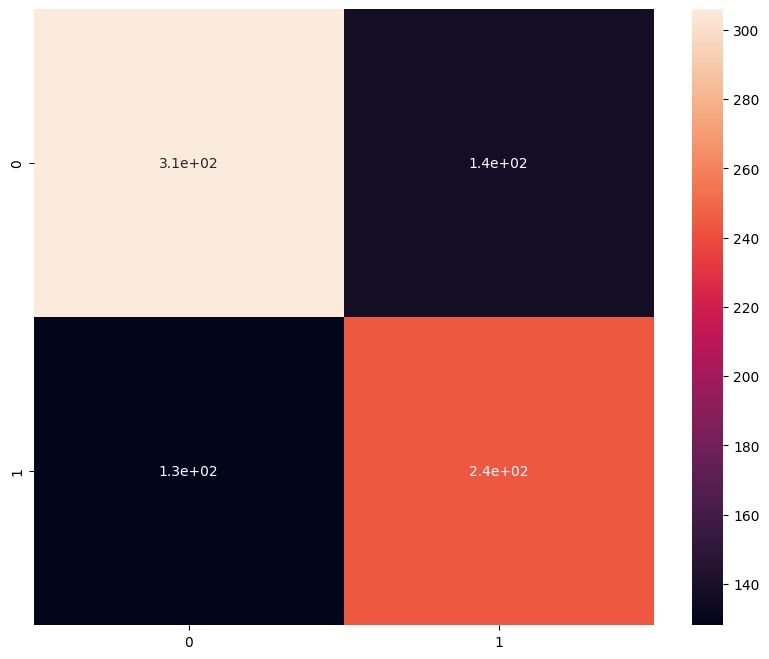

In [36]:
df_accuracy = accuracy_score(y_test,df_pred)
print("Decision Tree Accuracy:", df_accuracy)
cm = confusion_matrix(y_test,df_pred)
%matplotlib inline
plt.figure(figsize=((10,8)))
sns.heatmap(cm,annot = True)

plt.show()

In [39]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = dt.predict(X_test)
 

Decision Tree Accuracy: 0.6748466257668712


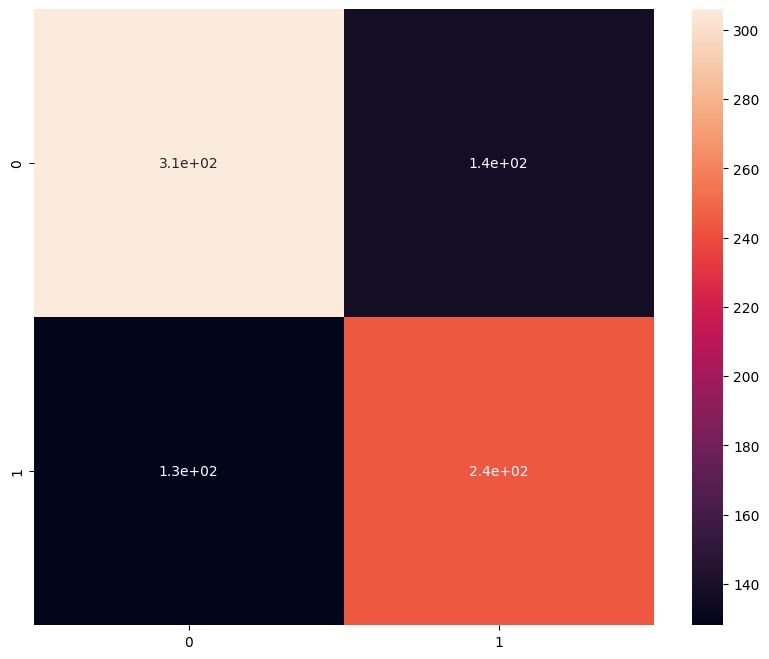

In [40]:
gbc_accuracy = accuracy_score(y_test,gbc_pred)
print("Decision Tree Accuracy:", gbc_accuracy)
cm = confusion_matrix(y_test,gbc_pred)
%matplotlib inline
plt.figure(figsize=((10,8)))
sns.heatmap(cm,annot = True)

plt.show()